In [1]:
from glob import glob
import pandas as pd
import pickle
import sys
from tqdm.notebook import tqdm

sys.path.insert(1, 'utils/')
from graph_distances import *

!mkdir distance_imgs

mkdir: distance_imgs: File exists


In [2]:
distances = []
for name in glob('ddists_complete/*.pickle'):
    yr = int(name[-11:-7])
    with open(name, 'rb') as f:
        df = pickle.load(f)
        f.close()
    distances.append((yr, df))

distances.sort(key=lambda i: i[0])

years, dfs = list(zip(*distances))

In [24]:
toks = ['משנה', 'נשנה', 'שונה', 'משתנה']

משנה


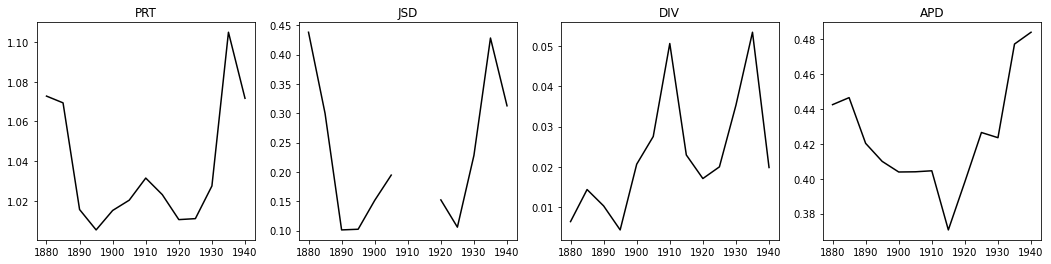

נשנה


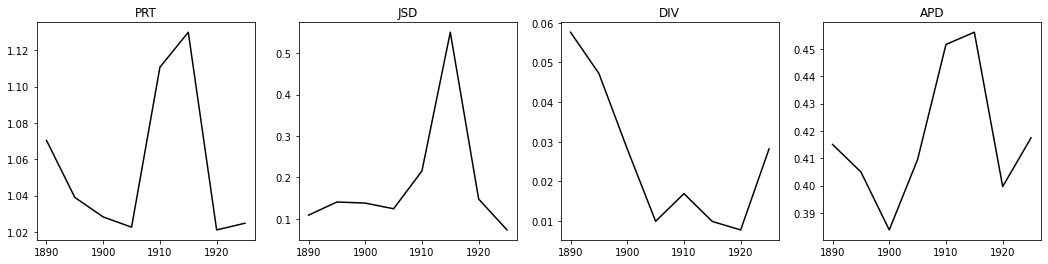

שונה


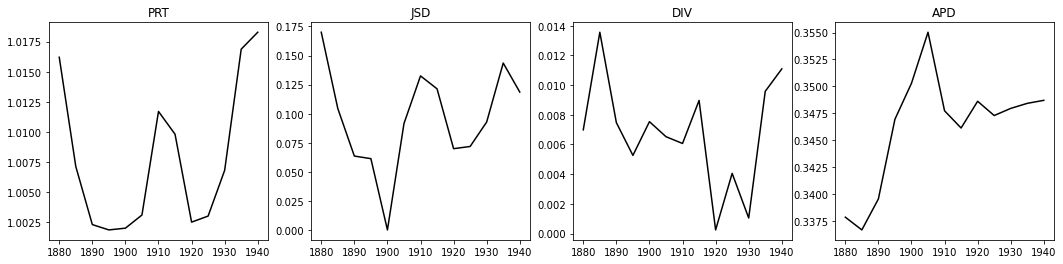

משתנה


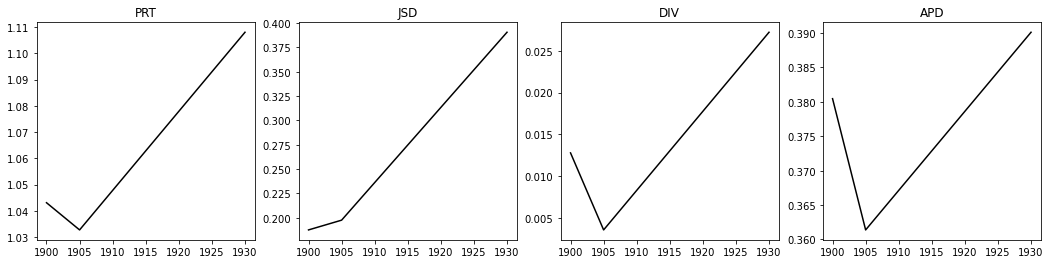

In [25]:
for tok in toks:
    print(tok)
    graphDistances(dfs, years, tok, saveFig=True)